In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [21]:
df_filtered = pd.read_csv(os.path.join('data','data_pull_raw_24.csv'), index_col=0)
%matplotlib qt5
df_filtered = df_filtered.loc[200:].reindex()
df_filtered.data.plot()

<Axes: >

In [24]:
df_filtered['zero'] = df_filtered['data'] - df_filtered['data'].iloc[300000:].mean()
df_filtered['integral'] = -1.0*df_filtered.zero.cumsum()
df_trimmed = df_filtered.iloc[:800000].copy().reindex()

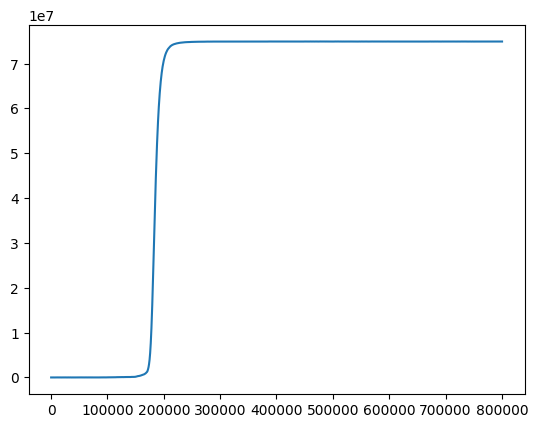

In [27]:
%matplotlib inline
plt.plot(df_trimmed.integral)

In [34]:
amp = df_trimmed.integral.iloc[350000:].mean() - df_trimmed.integral.iloc[:100000].mean()
# amp = -7.44528e07*2.5/32767 * 1/96937 * 1/1144.8
ampvolts = amp * 2.5/32767 * 1/96937 * 1/1144.8
f'{ampvolts = :.4e}'

'ampvolts = 5.1497e-05'